<a href="https://colab.research.google.com/github/gohenry/DataScienceCoursera/blob/master/ArtAuction_1129_Branch_Image_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pip install --user --upgrade tensorflow

In [2]:
import tensorflow as tf
help(tf)


Help on package tensorflow:

NAME
    tensorflow - TensorFlow root package

PACKAGE CONTENTS


DATA
    __compiler_version__ = '7.3.1 20180303'
    __cxx11_abi_flag__ = 0
    __git_version__ = 'v2.0.0-rc2-26-g64c3d38'
    __monolithic_build__ = 0
    bfloat16 = tf.bfloat16
    bool = tf.bool
    complex128 = tf.complex128
    complex64 = tf.complex64
    double = tf.float64
    float16 = tf.float16
    float32 = tf.float32
    float64 = tf.float64
    half = tf.float16
    int16 = tf.int16
    int32 = tf.int32
    int64 = tf.int64
    int8 = tf.int8
    newaxis = None
    qint16 = tf.qint16
    qint32 = tf.qint32
    qint8 = tf.qint8
    quint16 = tf.quint16
    quint8 = tf.quint8
    resource = tf.resource
    string = tf.string
    uint16 = tf.uint16
    uint32 = tf.uint32
    uint64 = tf.uint64
    uint8 = tf.uint8
    variant = tf.variant

VERSION
    2.0.0

FILE
    /root/.local/lib/python3.6/site-packages/tensorflow/__init__.py




In [3]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
#import the necessary packages
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
import pydot
import keras
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import np_utils
from keras.utils import layer_utils
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import keras.backend as K
K.set_image_data_format('channels_last')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

from IPython.display import SVG




Using TensorFlow backend.


In [6]:
#load numerical data using Pandas
!pip install -q xlrd
!pip install pillow

cols = ['author','creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media','image']
df = pd.read_excel('result_2009.xlsx', usecols=cols)
df = pd.get_dummies(df, prefix=['auth'], columns = ['author'])
df



,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
0,1964.0,5.0,5.0,150000.0,200000.0,NaN,2019.0,images/Andy Warhol-Flowers-1-0.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985.0,20.0,16.0,60000.0,80000.0,NaN,2019.0,images/Andy Warhol-Self-Defense (Positive)-1-2...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [7]:
#drop rows containing missing data
ccols = ['creation_year','height(inch)','width(inch)','estimate_low($)','estimate_high','auction_year','artist_birth','hammer price', 'artist_rank','artist_points','num_bill','wealth_bill','canvas','paper','Acrylic','oil','Mixed media']
df[ccols] = df[ccols].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1976.0,8.0,11.0,70000.0,100000.0,70000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1985.0,8.0,16.0,30000.0,50000.0,72000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [8]:
# Pre-processing array to remove problematic rows. 
# images/François Morellet-Ligne droite-1-13.jpg

#df[df['image'].str.contains('Morellet-Ligne droite-1-13')]
df = df[~df['image'].str.contains("Morellet-Ligne droite-1-13")]
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,hammer price,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,...,auth_Joseph Beuys,auth_Kader Attia,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono
1,1964.0,22.0,22.0,1500000.0,2000000.0,1150000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1985.0,20.0,16.0,60000.0,80000.0,50000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1983.0,20.0,16.0,50000.0,70000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1976.0,8.0,11.0,70000.0,100000.0,70000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1985.0,8.0,16.0,30000.0,50000.0,72000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,313572.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14700,1994.0,2.0,19.0,218820.0,281340.0,484530.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14701,1995.0,79.0,39.0,250000.0,350000.0,440000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14702,1996.0,49.0,27.0,70000.0,100000.0,60000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50c0653c88>]],
      dtype=object)

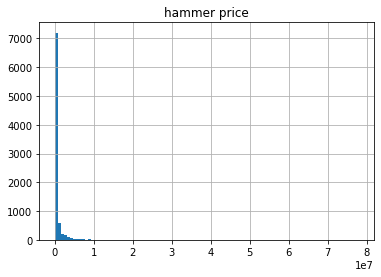

In [9]:
#check distribution of hammer price
df.hist(column='hammer price', bins=100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b5ef2198>]],
      dtype=object)

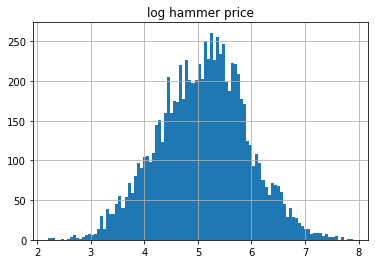

In [10]:
#create log hammer price
df['log hammer price'] = np.log10(df['hammer price'])
df.hist(column='log hammer price', bins=100)

In [0]:
#drop 'hammer price' column
df = df.drop(columns='hammer price')
df['image'].replace({'\n':' '},inplace=True,regex=True)

In [12]:
#bin log hammer price
bins = [0,3,3.25,3.5, 3.75, 4,4.25,4.5,4.75, 5,5.25, 5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8]
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df['binned'] = pd.cut(df['log hammer price'], bins=bins, labels=labels)
print(df)
df.shape
len(labels)

       creation_year  height(inch)  ...  log hammer price  binned
1             1964.0          22.0  ...          6.060698      13
3             1985.0          20.0  ...          4.698970       7
4             1983.0          20.0  ...          4.845098       8
5             1976.0           8.0  ...          4.845098       8
6             1985.0           8.0  ...          4.857332       8
...              ...           ...  ...               ...     ...
14699         1999.0           2.0  ...          5.496337      10
14700         1994.0           2.0  ...          5.685321      11
14701         1995.0          79.0  ...          5.643453      11
14702         1996.0          49.0  ...          4.778151       8
14703         1986.0          39.0  ...          3.032216       1

[8558 rows x 107 columns]


21

In [13]:
df

,creation_year,height(inch),width(inch),estimate_low($),estimate_high,auction_year,image,artist_birth,artist_rank,artist_points,num_bill,wealth_bill,canvas,paper,Acrylic,Mixed media,oil,auth_Ai Weiwei,auth_Alberto Giacometti,auth_Alex Katz,auth_Alexander Calder,auth_Alighiero Boëtti,auth_Andy Warhol,auth_Anselm Kiefer,auth_Antoni Tàpies,auth_Arnulf Rainer,auth_Carl Andre,auth_Christian Boltanski,auth_Christian Marclay,auth_Cindy Sherman,auth_Claes Oldenburg,auth_Cy Twombly,auth_Damien Hirst,auth_Dan Graham,auth_Daniel Buren,auth_David Hockney,auth_Dieter Roth,auth_Douglas Gordon,auth_Ed Ruscha,auth_Erwin Wurm,...,auth_Kiki Smith,auth_Lawrence Weiner,auth_Louise Bourgeois,auth_Lucio Fontana,auth_Man Ray,auth_Marcel Broodthaers,auth_Marcel Duchamp,auth_Maria Lassnig,auth_Marina Abramovic,auth_Marlene Dumas,auth_Martin Kippenberger,auth_Max Ernst,auth_Mike Kelley,auth_Mona Hatoum,auth_Nam June Paik,auth_Olafur Eliasson,auth_Pablo Picasso,auth_Paul Klee,auth_Paul McCarthy,auth_Pierre Huyghe,auth_Richard Long,auth_Richard Prince,auth_Richard Serra,auth_Rirkrit Tiravanija,auth_Robert Mapplethorpe,auth_Robert Rauschenberg,auth_Rosemarie Trockel,auth_Roy Lichtenstein,auth_Sigmar Polke,auth_Sol LeWitt,auth_Tacita Dean,auth_Thomas Ruff,auth_Thomas Schütte,auth_Tony Cragg,auth_Valie Export,auth_William Kentridge,auth_Yayoi Kusama,auth_Yoko Ono,log hammer price,binned
1,1964.0,22.0,22.0,1500000.0,2000000.0,2019.0,images/Andy Warhol-Flowers-1-1.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.060698,13
3,1985.0,20.0,16.0,60000.0,80000.0,2019.0,images/Andy Warhol-Self-Defense (Negative)-1-3...,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.698970,7
4,1983.0,20.0,16.0,50000.0,70000.0,2019.0,images/Andy Warhol-Untitled (Four)-1-4.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098,8
5,1976.0,8.0,11.0,70000.0,100000.0,2019.0,images/Andy Warhol-Torso-1-5.jpg,1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.845098,8
6,1985.0,8.0,16.0,30000.0,50000.0,2019.0,"images/Andy Warhol-Are You ""Different?"" (Posit...",1928.0,1.0,51496.69,2153.0,8.7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.857332,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14699,1999.0,2.0,15.0,149320.0,223980.0,2010.0,images/Marlene Dumas-Dancer-3-13.jpg,1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.496337,10
14700,1994.0,2.0,19.0,218820.0,281340.0,2010.0,"images/Marlene Dumas-""The Peeping Tom ""-3-14.jpg",1953.0,114.0,14262.10,1011.0,3.6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.685321,11
14701,1995.0,79.0,39.0,250000.0,350000.0,2009.0,images/Marlene Dumas-Evil Eye-3-15.jpg,1953.0,98.0,14765.08,793.0,2.4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.643453,11
14702,1996.0,49.0,27.0,70000.0,100000.0,2009.0,images/Marlene Dumas-Transparent Slip-3-16.jpg,1953.0,98.0,14765.08,793.0,2.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
#########################
# 2018 and beyond X / Y #
#########################

dataset = df.values

# Shuffle rows to make dev vs testing split easier later 
df = df.sample(frac=1)

# Train set from < 2018 data
# Dev and Test set from >= 2018 data

df_train = df[df['auction_year'] < 2018.]
df_devtest = df[df['auction_year'] >= 2018.]

print("df_train",df_train.shape)
print("df_devtest",df_devtest.shape)

df_train (7105, 107)
df_devtest (1453, 107)


In [15]:
# Making training/testing/evaluation for image/numeric

## this part for Images and Y value 
dataset_train = df_train.values
X_image_train = dataset_train[:,6]
Y_train = dataset_train[:,106]

dataset_devtest = df_devtest.values
X_image_devtest = dataset_devtest[:,6]
Y_devtest = dataset_devtest[:,106]

## this part for numerical data ##
dataset_train=df_train.drop(columns=['image','log hammer price','binned'])
dataset_devtest=df_devtest.drop(columns=['image','log hammer price','binned'])

X_numeric_train = dataset_train.values
X_numeric_devtest = dataset_devtest.values

## split dev set and test set 

X_image_dev = X_image_devtest[:725]
X_image_test = X_image_devtest[725:]
Y_dev = Y_devtest[:725]
Y_test = Y_devtest[725:]
X_numeric_dev = X_numeric_devtest[:725]
X_numeric_test = X_numeric_devtest[725:]

## final check 
print ("X_image_train", X_image_train.shape)
print ("X_numeric_train", X_numeric_train.shape)
print ("Y_train", Y_train.shape)

#print(type(X_image_tt))
print ("X_image_dev", X_image_dev.shape)
print ("X_image_test", X_image_test.shape)
print ("X_numeric_dev", X_numeric_dev.shape)
print ("X_numeric_test", X_numeric_test.shape)
print ("Y_dev", Y_dev.shape)
print ("Y_test", Y_test.shape)

#print(type(Y_tt))
X_numeric_test

X_image_train (7105,)
X_numeric_train (7105, 104)
Y_train (7105,)
X_image_dev (725,)
X_image_test (728,)
X_numeric_dev (725, 104)
X_numeric_test (728, 104)
Y_dev (725,)
Y_test (728,)


array([[2.011e+03, 4.000e+00, 6.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.985e+03, 8.000e+00, 1.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.997e+03, 1.800e+01, 2.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.953e+03, 1.400e+01, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.964e+03, 2.400e+01, 2.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.006e+03, 3.000e+01, 4.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [0]:
# Y train, dev, test set in log hammer price
Y_train_loghammerprice=df_train['log hammer price']
Y_devtest_loghammerprice=df_devtest['log hammer price']

In [17]:
Y_dev_loghammerprice = Y_devtest_loghammerprice[:725]
Y_test_loghammerprice = Y_devtest_loghammerprice[725:]
Y_train_loghammerprice

4007     5.273200
4114     5.903090
808      5.079181
5295     4.662843
8487     5.290551
           ...   
3907     5.795880
12801    5.602060
7387     5.353224
4939     3.204120
14633    4.588518
Name: log hammer price, Length: 7105, dtype: float64

In [18]:
## skip if using the whole dataset ##
#image_number_start = 3000
#image_number_end = 3400

#load_image = X_image_train[image_number_start:image_number_end]
#load_numeric = X_numeric_train[image_number_start:image_number_end]
#load_bin = Y_train[image_number_start:image_number_end]

#load_image_test = X_image_test[image_number_start:image_number_end]
#load_numeric_test = X_numeric_test[image_number_start:image_number_end]
#load_bin_test = Y_test[image_number_start:image_number_end]

  ## load_image
  #problem_image = 'images/Andy Warhol-Heaven and Hell Are Just One Breath Away (Positive and Negati                 ...-28-20.jpg' #X_image[510]
  #print(problem_image)

  # Output Images 
 # print("test image")
#imgg = mpimg.imread(load_image[142]) 
 # plt.imshow(imgg) 
""

''

In [0]:
#################################
## CNN ##########################
#################################

In [20]:
################################
## Batch pre processing block ##
## You do it only once - #######
################################
"""
import cv2
import glob
from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image
from keras.preprocessing.image import save_img

filenames = [img for img in glob.glob("images/*.jpg")]

images = []

for img in filenames:
    print("images/reduced"+img)
    n = cv2.imread(img)
    n2 = cv2.resize(n,(224,224))
    status = cv2.imwrite("images/reduced"+img , n2)
    print("Image writtedn to file-system : ", status)
    
"""

'\nimport cv2\nimport glob\nfrom PIL import Image\nfrom skimage.transform import resize\nfrom keras.preprocessing import image\nfrom keras.preprocessing.image import save_img\n\nfilenames = [img for img in glob.glob("images/*.jpg")]\n\nimages = []\n\nfor img in filenames:\n    print("images/reduced"+img)\n    n = cv2.imread(img)\n    n2 = cv2.resize(n,(224,224))\n    status = cv2.imwrite("images/reduced"+img , n2)\n    print("Image writtedn to file-system : ", status)\n    \n'

In [21]:
"""
# Test section

#from PIL import Image
#from skimage.transform import resize
#from keras.preprocessing import image

import cv2
import glob
from PIL import Image
from skimage.transform import resize
from keras.preprocessing import image
from keras.preprocessing.image import save_img

X_image_trainarray = []
count = 0

for f in X_image_train:
    print(count, len(X_image_train), f)
    m = cv2.imread("images/reduced"+f)
    m = image.img_to_array(m)
    X_image_trainarray.append(m)
    count += 1


#x_Image_array = np.array(x_Image_array)
#x_Image_array.shape

"""

'\n# Test section\n\n#from PIL import Image\n#from skimage.transform import resize\n#from keras.preprocessing import image\n\nimport cv2\nimport glob\nfrom PIL import Image\nfrom skimage.transform import resize\nfrom keras.preprocessing import image\nfrom keras.preprocessing.image import save_img\n\nX_image_trainarray = []\ncount = 0\n\nfor f in X_image_train:\n    print(count, len(X_image_train), f)\n    m = cv2.imread("images/reduced"+f)\n    m = image.img_to_array(m)\n    X_image_trainarray.append(m)\n    count += 1\n\n\n#x_Image_array = np.array(x_Image_array)\n#x_Image_array.shape\n\n'

In [22]:
"""
X_image_devarray = []
count = 0

for f in X_image_dev:
    print(count, len(X_image_dev), f)
    m = cv2.imread("images/reduced"+f)
    m = image.img_to_array(m)
    X_image_devarray.append(m)
    count += 1
"""

'\nX_image_devarray = []\ncount = 0\n\nfor f in X_image_dev:\n    print(count, len(X_image_dev), f)\n    m = cv2.imread("images/reduced"+f)\n    m = image.img_to_array(m)\n    X_image_devarray.append(m)\n    count += 1\n'

In [23]:
"""
X_image_testarray = []
count = 0

for f in X_image_test:
    print(count, len(X_image_test), f)
    m = cv2.imread("images/reduced"+f)
    m = image.img_to_array(m)
    X_image_testarray.append(m)
    count += 1

"""

'\nX_image_testarray = []\ncount = 0\n\nfor f in X_image_test:\n    print(count, len(X_image_test), f)\n    m = cv2.imread("images/reduced"+f)\n    m = image.img_to_array(m)\n    X_image_testarray.append(m)\n    count += 1\n\n'

In [24]:
"""
# convert to array
X_image_trainarray = np.asarray(X_image_trainarray)
X_image_devarray = np.asarray(X_image_devarray)
X_image_testarray = np.asarray(X_image_testarray)

# save as .npy files
np.save('X_image_trainarray.npy', X_image_trainarray)
np.save('X_image_devarray.npy', X_image_devarray)
np.save('X_image_testarray.npy', X_image_testarray)

np.save('X_numeric_test.npy', X_numeric_test)
np.save('X_numeric_train.npy', X_numeric_train)
np.save('X_numeric_dev.npy', X_numeric_dev)

np.save('Y_train_loghammerprice.npy', Y_train_loghammerprice)
np.save('Y_dev_loghammerprice.npy', Y_dev_loghammerprice)
np.save('Y_test_loghammerprice.npy', Y_test_loghammerprice)
"""

"\n# convert to array\nX_image_trainarray = np.asarray(X_image_trainarray)\nX_image_devarray = np.asarray(X_image_devarray)\nX_image_testarray = np.asarray(X_image_testarray)\n\n# save as .npy files\nnp.save('X_image_trainarray.npy', X_image_trainarray)\nnp.save('X_image_devarray.npy', X_image_devarray)\nnp.save('X_image_testarray.npy', X_image_testarray)\n\nnp.save('X_numeric_test.npy', X_numeric_test)\nnp.save('X_numeric_train.npy', X_numeric_train)\nnp.save('X_numeric_dev.npy', X_numeric_dev)\n\nnp.save('Y_train_loghammerprice.npy', Y_train_loghammerprice)\nnp.save('Y_dev_loghammerprice.npy', Y_dev_loghammerprice)\nnp.save('Y_test_loghammerprice.npy', Y_test_loghammerprice)\n"

In [25]:
"""
print("X_image_trainarray", X_image_trainarray.shape)
print("X_image_devarray", X_image_devarray.shape)
print("X_image_testarray", X_image_testarray.shape)
print("X_numeric_test", X_numeric_test.shape)
print("X_numeric_train", X_numeric_train.shape)
print("X_numeric_dev", X_numeric_dev.shape)
print("Y_train_loghammerprice", Y_train_loghammerprice.shape)
print("Y_dev_loghammerprice", Y_dev_loghammerprice.shape)
print("Y_test_loghammerprice", Y_test_loghammerprice.shape)
"""

'\nprint("X_image_trainarray", X_image_trainarray.shape)\nprint("X_image_devarray", X_image_devarray.shape)\nprint("X_image_testarray", X_image_testarray.shape)\nprint("X_numeric_test", X_numeric_test.shape)\nprint("X_numeric_train", X_numeric_train.shape)\nprint("X_numeric_dev", X_numeric_dev.shape)\nprint("Y_train_loghammerprice", Y_train_loghammerprice.shape)\nprint("Y_dev_loghammerprice", Y_dev_loghammerprice.shape)\nprint("Y_test_loghammerprice", Y_test_loghammerprice.shape)\n'

In [26]:
# one-hot encode the log hammer price <==== NEED TO BE FIXED!!!!
encoder = LabelEncoder()

encoder.fit(Y_train)
encoded_Y_train = encoder.transform(Y_train)
dummy_Y_train = np_utils.to_categorical(encoded_Y_train) 

encoder.fit(Y_dev)
encoded_Y_dev = encoder.transform(Y_dev)
dummy_Y_dev = np_utils.to_categorical(encoded_Y_dev) 

encoder.fit(Y_test)
encoded_Y_test = encoder.transform(Y_test)
dummy_Y_test = np_utils.to_categorical(encoded_Y_test) 

print(dummy_Y_train)
print(dummy_Y_train.shape)
print(dummy_Y_dev.shape)
print(dummy_Y_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(7105, 21)
(725, 19)
(728, 21)


In [0]:
# load dataset from files

X_image_trainarray = np.load('X_image_trainarray.npy')
X_image_devarray = np.load('X_image_devarray.npy')
X_image_testarray = np.load('X_image_testarray.npy')
X_numeric_train = np.load('X_numeric_train.npy')
X_numeric_dev = np.load('X_numeric_dev.npy')
X_numeric_test = np.load('X_numeric_test.npy')
Y_train_loghammerprice = np.load('Y_train_loghammerprice.npy')
Y_dev_loghammerprice = np.load('Y_dev_loghammerprice.npy')
Y_test_loghammerprice = np.load('Y_test_loghammerprice.npy')

In [0]:
## Subsample the total sample space to accelerate Image CNN TensorBoard search. ##

subsample_factor=10
X_train_sub = np.floor(len(X_image_trainarray)/subsample_factor)
X_dev_sub = np.floor(len(X_image_devarray)/subsample_factor)
X_test_sub = np.floor(len(X_image_testarray)/subsample_factor)

# This is actual number of entries after sub-sampling 
X_train_sub = X_train_sub.astype(int)
X_dev_sub = X_dev_sub.astype(int)
X_test_sub = X_test_sub.astype(int)

# This gets the indices to make sure the same entries are subsampled between X and Y 
X_train_sub_idx = np.random.choice(np.arange(len(X_image_trainarray)), X_train_sub, replace=False)
X_dev_sub_idx = np.random.choice(np.arange(len(X_image_devarray)), X_dev_sub, replace=False)
X_test_sub_idx = np.random.choice(np.arange(len(X_image_testarray)), X_test_sub, replace=False)

# Apply the indices 
X_image_trainarray_sub = X_image_trainarray[X_train_sub_idx,:,:,:]
X_image_devarray_sub = X_image_devarray[X_dev_sub_idx,:,:,:]
X_image_testarray_sub = X_image_testarray[X_test_sub_idx,:,:,:]
Y_train_loghammerprice_sub = Y_train_loghammerprice[X_train_sub_idx]
Y_dev_loghammerprice_sub = Y_dev_loghammerprice[X_dev_sub_idx]
Y_test_loghammerprice_sub = Y_test_loghammerprice[X_test_sub_idx]

In [29]:
print("X_image_trainarray", X_image_trainarray.shape)
print("X_image_devarray", X_image_devarray.shape)
print("X_image_testarray", X_image_testarray.shape)

print("X_image_trainarray_sub", X_image_trainarray_sub.shape)
print("X_image_devarray_sub", X_image_devarray_sub.shape)
print("X_image_testarray_sub", X_image_testarray_sub.shape)

print("X_numeric_train", X_numeric_train.shape)
print("X_numeric_test", X_numeric_test.shape)
print("X_numeric_dev", X_numeric_dev.shape)

print("Y_train_loghammerprice", Y_train_loghammerprice.shape)
print("Y_dev_loghammerprice", Y_dev_loghammerprice.shape)
print("Y_test_loghammerprice", Y_test_loghammerprice.shape)

print("Y_train_loghammerprice_sub", Y_train_loghammerprice_sub.shape)
print("Y_dev_loghammerprice_sub", Y_dev_loghammerprice_sub.shape)
print("Y_test_loghammerprice_sub", Y_test_loghammerprice_sub.shape)

X_image_trainarray (7105, 224, 224, 3)
X_image_devarray (725, 224, 224, 3)
X_image_testarray (728, 224, 224, 3)
X_image_trainarray_sub (710, 224, 224, 3)
X_image_devarray_sub (72, 224, 224, 3)
X_image_testarray_sub (72, 224, 224, 3)
X_numeric_train (7105, 104)
X_numeric_test (728, 104)
X_numeric_dev (725, 104)
Y_train_loghammerprice (7105,)
Y_dev_loghammerprice (725,)
Y_test_loghammerprice (728,)
Y_train_loghammerprice_sub (710,)
Y_dev_loghammerprice_sub (72,)
Y_test_loghammerprice_sub (72,)


In [0]:
#standardize image arrays
X_image_trainarray_sub /=255
X_image_devarray_sub /=255
X_image_testarray_sub /=255

In [31]:
"""
# Split X_numeric into numerical and categorical data. 
X_numeric_train_1 = X_numeric_train[:,:11]
X_numeric_train_2 = X_numeric_train[:,11:]

X_numeric_dev_1 = X_numeric_dev[:,:11]
X_numeric_dev_2 = X_numeric_dev[:,11:]

X_numeric_test_1 = X_numeric_test[:,:11]
X_numeric_test_2 = X_numeric_test[:,11:]

#standardize numerical data using mean and standard deviation of training samples
scaler = StandardScaler()

scaler.fit(X_numeric_train_1)
X_numeric_train_1_scaled = scaler.transform(X_numeric_train_1)
X_numeric_dev_1_scaled = scaler.transform(X_numeric_dev_1)
X_numeric_test_1_scaled = scaler.transform(X_numeric_test_1)

# construct our train/dev/test set by concatenating the categorical features with the continuous features
X_numeric_train_scaled = np.hstack([X_numeric_train_1_scaled, X_numeric_train_2])
X_numeric_dev_scaled = np.hstack([X_numeric_dev_1_scaled, X_numeric_dev_2])
X_numeric_test_scaled = np.hstack([X_numeric_test_1_scaled, X_numeric_test_2])
"""

'\n# Split X_numeric into numerical and categorical data. \nX_numeric_train_1 = X_numeric_train[:,:11]\nX_numeric_train_2 = X_numeric_train[:,11:]\n\nX_numeric_dev_1 = X_numeric_dev[:,:11]\nX_numeric_dev_2 = X_numeric_dev[:,11:]\n\nX_numeric_test_1 = X_numeric_test[:,:11]\nX_numeric_test_2 = X_numeric_test[:,11:]\n\n#standardize numerical data using mean and standard deviation of training samples\nscaler = StandardScaler()\n\nscaler.fit(X_numeric_train_1)\nX_numeric_train_1_scaled = scaler.transform(X_numeric_train_1)\nX_numeric_dev_1_scaled = scaler.transform(X_numeric_dev_1)\nX_numeric_test_1_scaled = scaler.transform(X_numeric_test_1)\n\n# construct our train/dev/test set by concatenating the categorical features with the continuous features\nX_numeric_train_scaled = np.hstack([X_numeric_train_1_scaled, X_numeric_train_2])\nX_numeric_dev_scaled = np.hstack([X_numeric_dev_1_scaled, X_numeric_dev_2])\nX_numeric_test_scaled = np.hstack([X_numeric_test_1_scaled, X_numeric_test_2])\n'

In [0]:
load_ext tensorboard

In [0]:
!rm -rf ./logs/ 

In [0]:
from time import time
from datetime import datetime
from packaging import version
import tensorflow as tf
from keras import optimizers

from keras.callbacks import TensorBoard
from tensorboard.plugins.hparams import api as hp


In [0]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([32, 64, 128]))
HP_BATCHN = hp.HParam('batch_number', hp.Discrete([32, 64]))
HP_LL = hp.HParam('learning_rate', hp.Discrete([0.001, 0.002, 0.004]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.2]))
HP_KERNEL = hp.HParam('kernel_size', hp.Discrete([5]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam']))



METRIC_ACCURACY = 'accuracy'

#with tf.summary.FileWriter('logs/hparam_tuning'):
with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_KERNEL, HP_OPTIMIZER, HP_LL, HP_BATCHN],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )



In [0]:
log_dir="logs/fit/"+ datetime.now().strftime("%Y%m%d-%H%M%S")

### When training Keras models, you can use callbacks instead of writing these directly:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir.format(time()))
#hp_callback = hp.KerasCallback(log_dir, hparams)

In [0]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [0]:
import tensorflow as tf
from keras import optimizers

def train_test_model(hparams):
  input_shape = (224,224,3)
  pool_size = 3
#  final_node_size = dummy_load_bin.shape[1]

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    
    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'),
    tf.keras.layers.MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation=tf.nn.relu),
  ])
  
    
  #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(
      learning_rate = hparams[HP_LL],
      optimizer = hparams[HP_OPTIMIZER],
      loss=rmse, 
      metrics=[r_square],
      )
  
  #callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

  model.fit(
      X_image_trainarray_sub, 
      Y_train_loghammerprice_sub, 
      batch_size=hparams[HP_BATCHN], 
      epochs=20, 
      callbacks=[tensorboard_callback], 
      validation_data = (X_image_devarray_sub, Y_dev_loghammerprice_sub)) 
  
  _, result = model.evaluate(X_image_testarray_sub, Y_test_loghammerprice_sub) 
  
  return result



In [0]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    print("accuracy", accuracy)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [0]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in HP_DROPOUT.domain.values:
    for kernel_size in HP_KERNEL.domain.values:
      for optimizer in HP_OPTIMIZER.domain.values:
        for learning_rate in HP_LL.domain.values:
          for batch_number in HP_BATCHN.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_KERNEL: kernel_size,
                HP_OPTIMIZER: optimizer,
                HP_LL: learning_rate,
                HP_BATCHN: batch_number,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'num_units': 32, 'dropout': 0.2, 'kernel_size': 5, 'optimizer': 'adam', 'learning_rate': 0.001, 'batch_number': 32}
Train on 710 samples, validate on 72 samples
Epoch 1/20
710/710 [==============================] - 85s 120ms/sample - loss: 4.1681 - r_square: -29.5849 - val_loss: 4.9008 - val_r_square: -58.3267
Epoch 2/20
710/710 [==============================] - 80s 113ms/sample - loss: 3.3662 - r_square: -21.6321 - val_loss: 4.8063 - val_r_square: -56.4505
Epoch 3/20
710/710 [==============================] - 80s 113ms/sample - loss: 2.8807 - r_square: -17.8584 - val_loss: 5.0336 - val_r_square: -61.4993
Epoch 4/20
710/710 [==============================] - 80s 113ms/sample - loss: 2.5275 - r_square: -14.8893 - val_loss: 5.0307 - val_r_square: -61.4612
Epoch 5/20
710/710 [==============================] - 80s 112ms/sample - loss: 2.3594 - r_square: -13.3914 - val_loss: 4.3716 - val_r_square: -49.9168
Epoch 6/20
710/710 [==============================] - 78s

In [1]:
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [0]:
%tensorboard --logdir logs/hparam_tuning/

In [0]:
up to here. 

In [0]:
### Text NET ##########
"""
from keras.layers import BatchNormalization
from keras import regularizers

def numerical_model(dim, regress=False):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim = dim, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(Dense(32, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
  
	# check to see if the regression node should be added
  if regress:
    model.add(Dense(1, activation="linear"))
 
	# return our model
  return model
  """

In [0]:
# use pretrained model - Resnet50
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

def cnn_model(regress=False):

  base_model = ResNet50(weights='imagenet', include_top=False)

  # add a global spatial average pooling layer
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  # let's add a fully-connected layer
  x = Dropout(0.5)(x)
  x = Dense(1024, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(1024, activation = 'relu')(x)

  # check to see if the regression node should be added
  if regress:
      x = Dense(1, activation="linear")(x)

  for layer in base_model.layers:
      layer.trainable = False

  # construct the CNN
  model = Model(inputs=base_model.input, outputs=x)

  # return the CNN
  return model

In [0]:
# create the numerical and CNN models
numeric = numerical_model(104, regress=False)
cnn = cnn_model(regress=False)

In [0]:
from keras.layers import concatenate

# create the input to our final set of layers as the *output* of both the numeric and CNN
combinedInput = concatenate([numeric.output, cnn.output])

print(combinedInput.shape)

In [0]:
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(1024, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001))(combinedInput)
x = BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
x = Dense(512, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001))(x)
x = BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones')(x)
x = Dense(1, activation='linear', kernel_initializer='normal')(x)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[numeric.input, cnn.input], outputs=x)

In [0]:
# root mean squared error (rmse) for regression
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [0]:
from keras.optimizers import Adam

# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=["mean_absolute_percentage_error", r_square])

In [0]:
# train the model
print("[INFO] training model...")
result = model.fit(
	[X_numeric_train_scaled, X_image_trainarray], Y_train_loghammerprice,
	validation_data=([X_numeric_dev_scaled, X_image_devarray], Y_dev_loghammerprice),
	epochs=5, batch_size=512)

In [0]:
y_pred = model.predict([X_numeric_test_scaled, X_image_testarray])



In [0]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = y_pred.flatten() - Y_test_loghammerprice
percentDiff = (diff / Y_test_loghammerprice) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
 
# finally, show some statistics on our model
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

In [0]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(result.history['val_r_square'])
plt.plot(result.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# print the linear regression and display datapoints
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(Y_test_loghammerprice.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(Y_test_loghammerprice, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()


In [0]:
# evaluate the model
model.evaluate(x = [X_numeric_test_scaled, X_image_testarray], y = Y_test_loghammerprice)

In [0]:
# split training set and test set (actually, it is "Validation set")
#x_Image_array_resized_train, x_Image_array_resized_test, load_bin_train, load_bin_test = train_test_split(x_Image_array, dummy_load_bin, test_size=0.25)

#x_train = np.multiply(x_Image_array_resized_train, 1/255)
#x_test = np.multiply(x_Image_array_resized_test, 1/255)
#y_train = load_bin_train
#y_test = load_bin_test

#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


In [0]:
load_ext tensorboard

In [0]:
!rm -rf ./logs/ 

In [0]:
from time import time
from datetime import datetime
from packaging import version
from keras.callbacks import TensorBoard
from tensorboard.plugins.hparams import api as hp


In [0]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.1, 0.2]))
#HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_KERNEL = hp.HParam('kernel_size', hp.Discrete([5, 7]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.FileWriter('logs/hparam_tuning'):
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_KERNEL],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [0]:

def train_test_model(hparams):
  input_shape = (224,224,3)
  # hparams[HP_KERNEL] = 7
  # hparams[HP_NUM_UNITS] = 32
  pool_size = 3
  final_node_size = dummy_load_bin.shape[1]

  model = Sequential()

  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same', input_shape=input_shape))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  
  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))

  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  model.add(Dropout(hparams[HP_DROPOUT]))
    
  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
    
  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))

  #model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  #model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  #model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  #model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Conv2D(hparams[HP_NUM_UNITS], (hparams[HP_KERNEL], hparams[HP_KERNEL]), activation='relu', padding='same'))
  model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
  model.add(MaxPooling2D((pool_size, pool_size), strides=(2, 2), padding='same'))
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Flatten())
  model.add(Dense(final_node_size, activation='softmax'))
    
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

  model.fit(x_train, y_train, batch_size=32, epochs=10) #, callbacks=[hp.KerasCallback('logs/hparam_tuning/', hparams)])
  _, accuracy = model.evaluate(x_test, y_test) 

  return accuracy



In [0]:
def run(run_dir, hparams):
  with tf.summary.FileWriter(run_dir):
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy)#, step=1)

In [0]:
log_dir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

### When training Keras models, you can use callbacks instead of writing these directly:
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir.format(time()))
#hp_callback = hp.KerasCallback(log_dir, hparams)

In [0]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in HP_DROPOUT.domain.values:
    for kernel_size in HP_KERNEL.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_KERNEL: kernel_size,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

In [0]:
#history = model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1, validation_data=(x_test, y_test), callbacks=[tensorboard_callback, hp_callback])
#history = model.fit(x_train, y_train, batch_size=32, epochs=50, callbacks=[tensorboard_callback])

In [0]:
# This evaluation is not actually done right. Need to get the real evaluation dataset (2018 and beyond)
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [0]:
#%tensorboard --logdir logs/fit
%tensorboard --logdir logs/hparam_tuning/

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#################################
## TEXT NET #####################
#################################

In [0]:
load_text

In [0]:
# split training set and validation set
#load_text = load_text.values
X_text_train, X_text_test, Y_text_train, Y_text_test = train_test_split(load_text, dummy_load_bin, test_size=0.1)
print(X_text_train.shape, Y_text_train.shape,X_text_test.shape, Y_text_test.shape)
X_text_test[:,10]

In [0]:
# Split columns to StandardScalar the table more effectively. 

X_text_train_1 = X_text_train[:,:11]
X_text_train_2 = X_text_train[:,11:]

print("X_text_train_1", X_text_train_1.shape)
print("X_text_train_2", X_text_train_2.shape)

X_text_test_1 = X_text_test[:, :11]
X_text_test_2 = X_text_test[:,11:]

print("X_text_test_1", X_text_test_1.shape)
print("X_text_test_2", X_text_test_2.shape)


In [0]:
 #standardize X_train and X_test using mean and standard deviation of training samples
scaler = StandardScaler()

scaler.fit(X_text_train_1)
X_text_train_1_scaled = scaler.transform(X_text_train_1)
X_text_test_1_scaled = scaler.transform(X_text_test_1)

In [0]:
# construct our training and testing data points by concatenating the categorical features with the continuous features
X_text_train_scaled = np.hstack([X_text_train_1_scaled, X_text_train_2])
X_text_test_scaled = np.hstack([X_text_test_1_scaled, X_text_test_2])
#X_dev_scaled = np.hstack([X_dev_scaled, X_dev_2])

In [0]:
final_node_size = dummy_load_bin.shape[1]

#Create model
model = Sequential()

from keras.layers import BatchNormalization
from keras import regularizers

#Add more layers
model.add(Dense(128, activation='relu', input_shape = (104,), kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
model.add(BatchNormalization(axis=-1, momentum = 0.99, epsilon = 0.001, center = True, scale = True, beta_initializer = 'zeros', gamma_initializer = 'ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Dense(32, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(final_node_size, activation='softmax', kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.0001)))

In [0]:
# complie the model using adam optimizer and categorical crossentropy 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()


In [0]:
import datetime

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [0]:
# train the model
#hist = model.fit(X_text_train_scaled, Y_text_train, batch_size=64, epochs=100, shuffle=True, callbacks=[tensorboard_callback])
hist = model.fit(X_text_train_scaled, Y_text_train, batch_size=64, epochs=100,validation_data= (X_text_test_scaled, Y_text_test), shuffle=True, callbacks=[tensorboard_callback])

In [0]:
model.evaluate(x = X_text_test_scaled, y = Y_text_test)

In [0]:
# plot the loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


#plot the accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [0]:
!tensorboard --logdir logs/fit